In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import wget
import zipfile
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

In [2]:
# url = "https://storage.googleapis.com/didow-ml-datasets/a-z-handwritten-data.zip"
# filename = wget.download(url)

In [3]:
local_zip = 'a-z-handwritten-data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./Dataset/')
zip_ref.close()

In [4]:
data = pd.read_csv('Dataset/A_Z Handwritten Data.csv')

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_labels = np.array(data.iloc[:,0].values)
data_letters = np.array(data.iloc[:,1:].values)

In [7]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_letters,
                                                  data_labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [9]:
x_train = reshape_normalize(x_train)
x_test = reshape_normalize(x_test)

print('training set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

training set:  (297960, 28, 28, 1) (297960,)
test set:  (74490, 28, 28, 1) (74490,)


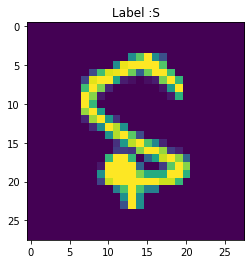

In [10]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [21]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [12]:
# from tensorflow.keras.applications import Xception, VGG16, InceptionV3
# from tensorflow.keras import layers
# from tensorflow.keras import Model
# import cv2

# x_train = [cv2.resize(image, (32, 32)) for image in x_train]
# x_test = [cv2.resize(image, (32, 32)) for image in x_test]
# pre_trained_model= VGG16(input_shape=(32,32,3),
#                         include_top=False)

# for layer in pre_trained_model.layers:
#     layer.trainable=False

# #flatten layer
# x= layers.Flatten()(pre_trained_model.output)
# #fully connected layer
# x= layers.Dense(1024, activation='relu')(x)
# x= layers.Dropout(0.5)(x)
# x= layers.Dense(26, activation='softmax')(x)

# model= Model(pre_trained_model.input,x)
# model.compile(optimizer='adam',
#         loss='categorical_crossentropy',
#         metrics=['accuracy'])

# model.summary()

In [13]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy') >= 98):
#       print("\nReached 98% accuracy. Stop Training")
#       self.model.stop_training = True

# callbacks = myCallback()

In [22]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.2348 - accuracy: 0.9328 - val_loss: 0.0991 - val_accuracy: 0.9721
Epoch 2/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.1108 - accuracy: 0.9676 - val_loss: 0.0732 - val_accuracy: 0.9797
Epoch 3/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.0869 - accuracy: 0.9742 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 4/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0652 - val_accuracy: 0.9826
Epoch 5/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.0622 - val_accuracy: 0.9833
Epoch 6/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0587 - val_accuracy: 0.9840
Epoch 7/20
7449/7449 [==============================] - 14s 2ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0608 - val_ac

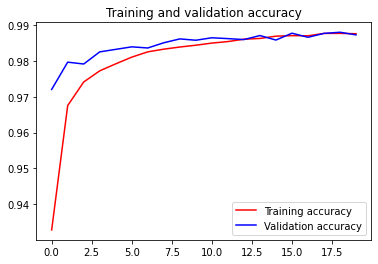

<Figure size 432x288 with 0 Axes>

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

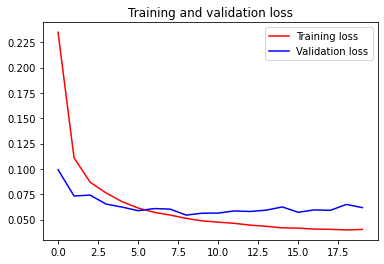

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

2328/2328 - 3s - loss: 0.0643 - accuracy: 0.9880 - 3s/epoch - 1ms/step
Test Loss:  0.06429139524698257
Test Accuracy:  0.9879715442657471


1/1 [==============================] - 0s 11ms/step


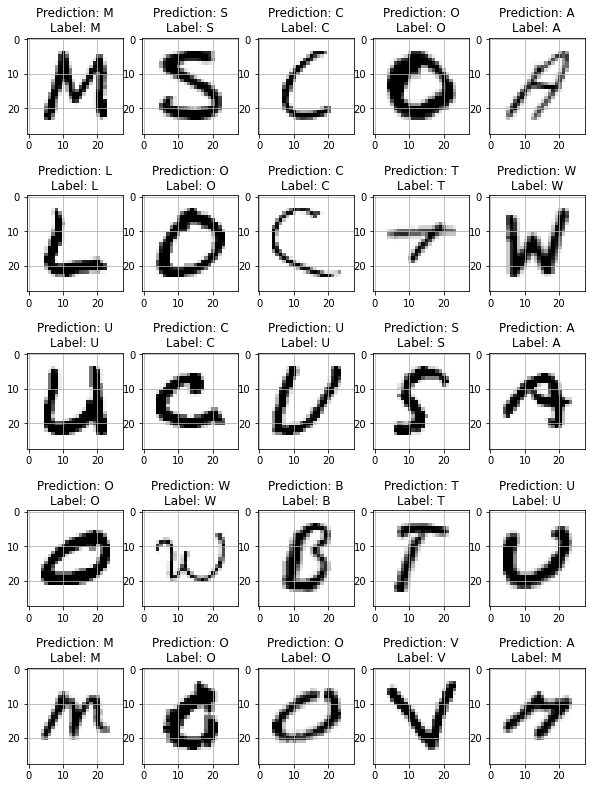

In [26]:
fig, axes = plt.subplots(5,5, figsize=(10,14))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(x_test[i], (28,28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(pred,letters[y_test[i]]))
    ax.grid()

In [ ]:
model_version = '1'
model_name = 'az_handwritten'
file_name = "./Model/{}/{}/az_model.h5".format(model_name, model_version)
model.save(file_name)

In [ ]:
# !tensorflowjs_converter --input_format=keras {saved_model_path} ./